Generating the linear data set
Have generated:
	N(train) examples            =  800
	N(test) examples             =  200


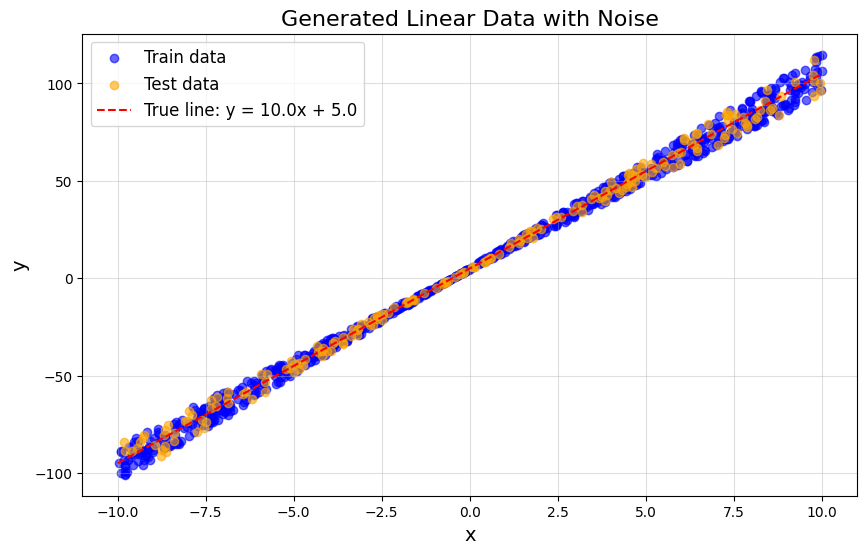

In [8]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import random

"""
Generate the data to be fitted
    xmin      Minimum value in x to sample
    xmax      Maximum value in x to sample
    Ntrain    Number of train data to generate
    Ntest     Number of test data to generate
    m         gradient for the line
    c         constant offset
    Noise     (fractional) Noise level to generate
"""
xmin   = -10
xmax   = 10
Ntrain = 800
Ntest  = 200
m      = 10.0  # Pendiente de la línea
c      = 5.0  # Intersección con el eje y
Noise  = 0.1  # Nivel de ruido relativo - Noise

def genData(xmin, xmax, Ntrain, Ntest, m, c, Noise):
    """
    Function to generate an ensemble of test and train data for fitting
    """
    print("\033[92mGenerating the linear data set\033[0m")
    x_train = []
    y_train = []
    x_test  = []
    y_test  = []

    #--------------------------------------------------------------------
    def sim_line(xmin, xmax, m, c, Noise):
        """
        Function to simulate a random data point for a straight line
        """
        x = random.random()*(xmax-xmin)+xmin
        y = (m*x+c)*(1 + (random.random() - 0.5) * 2 * Noise)  # Ruido relativo bidireccional

        return x, y
    #--------------------------------------------------------------------

    for i in range(Ntrain):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_train.append(x)
        y_train.append(y)

    for i in range(Ntest):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_test.append(x)
        y_test.append(y)

    return x_train, y_train, x_test, y_test

# Generate data for fitting
x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

print("Have generated:")
print("\tN(train) examples            = ", len(x_train))
print("\tN(test) examples             = ", len(x_test))

# Visualize the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', alpha=0.6, label='Train data')
plt.scatter(x_test, y_test, color='orange', alpha=0.6, label='Test data')
plt.plot(
    [xmin, xmax],
    [m*xmin + c, m*xmax + c],
    color='red',
    linestyle='--',
    label='True line: y = {:.1f}x + {:.1f}'.format(m, c)
)
plt.title("Generated Linear Data with Noise", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.savefig('LinearData.pdf')
plt.show()

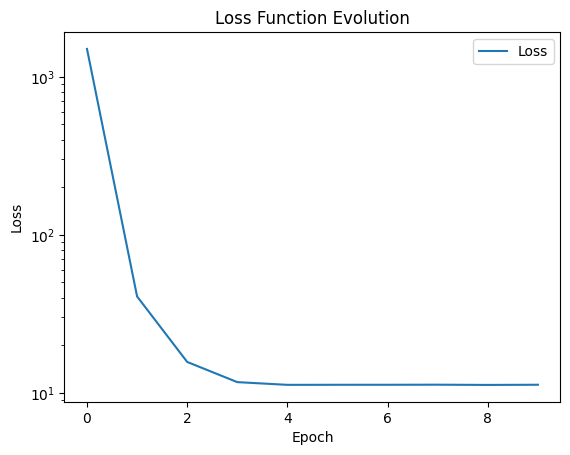

	m = 9.9623
	c = 5.1089
	Final MSE loss = 11.2563
	Fitted line xrange = [-10.0, 10.0], y range = [-94.5, 104.7]


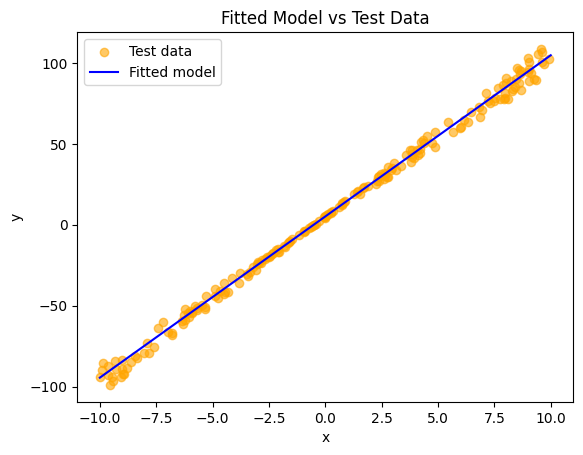

In [9]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Data generation (reutilizando la función genData del paso anterior)
xmin   = -10
xmax   = 10
Ntrain = 800
Ntest  = 200
m      = 10.0 #Pendiente
c      = 5.0
Noise  = 0.1 #Ruido

def genData(xmin, xmax, Ntrain, Ntest, m, c, Noise):
    x_train, y_train, x_test, y_test = [], [], [], []
    def sim_line(xmin, xmax, m, c, Noise):
        x = random.random() * (xmax - xmin) + xmin
        y = (m * x + c) * (1 + (random.random() - 0.5) * 2 * Noise)
        return x, y
    for _ in range(Ntrain):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_train.append(x)
        y_train.append(y)
    for _ in range(Ntest):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_test.append(x)
        y_test.append(y)
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

# Training configuration
Nepochs = 10  # Epocas
learning_rate = 0.5

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))

# Specify the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn)

# Train the model
history = model.fit(np.array(x_train), np.array(y_train), epochs=Nepochs, verbose=0) # Convert to numpy arrays

# Plot the loss function evolution
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Function Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

# Extract and print the trained parameters
layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0] * xmin + biases[0]
ymax = weights[0][0] * xmax + biases[0]

print("\tm = {:.4f}".format(weights[0][0]))
print("\tc = {:.4f}".format(biases[0]))
print("\tFinal MSE loss = {:.4f}".format(history.history['loss'][-1]))
print("\tFitted line xrange = [{:.1f}, {:.1f}], y range = [{:.1f}, {:.1f}]".format(xmin, xmax, ymin, ymax))

# Plot the test data and the fitted line
plt.scatter(x_test, y_test, color='orange', alpha=0.6, label='Test data')
plt.plot([xmin, xmax], [ymin, ymax], 'b-', label='Fitted model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Model vs Test Data')
plt.savefig('LossFunction.pdf')
plt.show()

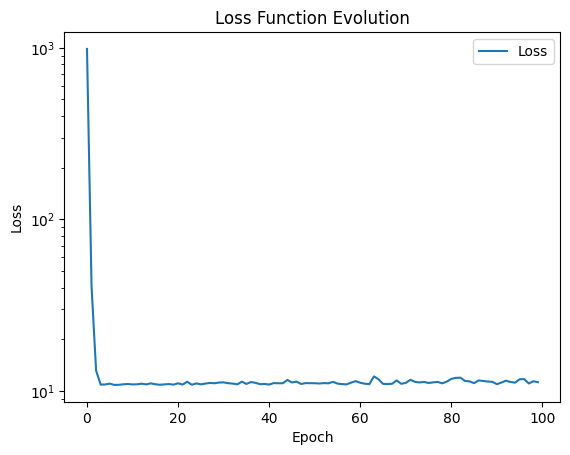

	m = 9.8884
	c = 5.0459
	Final MSE loss = 11.2588
	Fitted line xrange = [-10.0, 10.0], y range = [-93.8, 103.9]


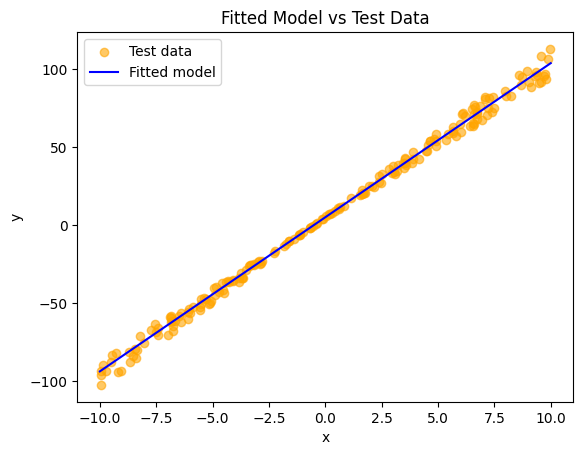

In [10]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Data generation (reutilizando la función genData del paso anterior)
xmin   = -10
xmax   = 10
Ntrain = 800
Ntest  = 200
m      = 10.0
c      = 5.0
Noise  = 0.1

def genData(xmin, xmax, Ntrain, Ntest, m, c, Noise):
    x_train, y_train, x_test, y_test = [], [], [], []
    def sim_line(xmin, xmax, m, c, Noise):
        x = random.random() * (xmax - xmin) + xmin
        y = (m * x + c) * (1 + (random.random() - 0.5) * 2 * Noise)
        return x, y
    for _ in range(Ntrain):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_train.append(x)
        y_train.append(y)
    for _ in range(Ntest):
        x, y = sim_line(xmin, xmax, m, c, Noise)
        x_test.append(x)
        y_test.append(y)
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

# Training configuration
Nepochs = 100  # Epoca diferente
learning_rate = 0.5

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))

# Specify the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn)

# Train the model
history = model.fit(np.array(x_train), np.array(y_train), epochs=Nepochs, verbose=0) # Convert to numpy arrays

# Plot the loss function evolution
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Function Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

# Extract and print the trained parameters
layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0] * xmin + biases[0]
ymax = weights[0][0] * xmax + biases[0]

print("\tm = {:.4f}".format(weights[0][0]))
print("\tc = {:.4f}".format(biases[0]))
print("\tFinal MSE loss = {:.4f}".format(history.history['loss'][-1]))
print("\tFitted line xrange = [{:.1f}, {:.1f}], y range = [{:.1f}, {:.1f}]".format(xmin, xmax, ymin, ymax))

# Plot the test data and the fitted line
plt.scatter(x_test, y_test, color='orange', alpha=0.6, label='Test data')
plt.plot([xmin, xmax], [ymin, ymax], 'b-', label='Fitted model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Model vs Test Data')
plt.savefig('LossFuntion100.pdf') # Use plt.savefig instead of plt.save
plt.show()